In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv(r"C://Users/Shivam/Desktop/ml_prg/dataset/CardioGoodFitness.csv")

In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [5]:
data['Age'].quantile(q=0.25),data['Age'].quantile(q=0.75), 1.5*data['Age'].quantile(q=0.75)

(24.0, 33.0, 49.5)

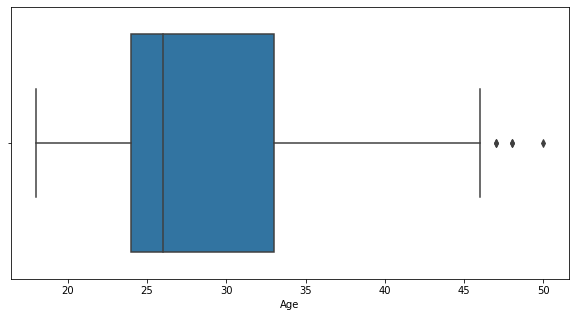

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Age'])
plt.show()

In [7]:
data['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [8]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

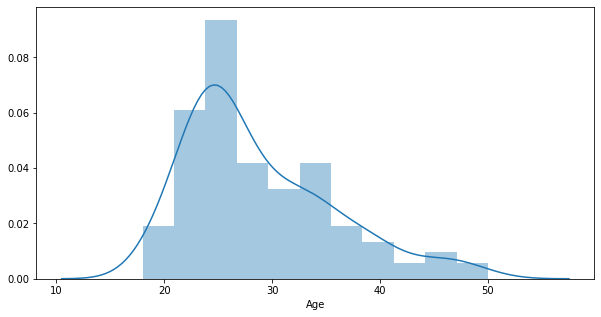

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(data['Age'],kde=True)
plt.show()

In [10]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


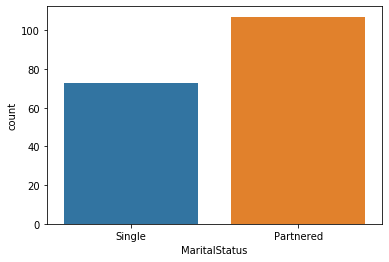

In [11]:
sns.countplot(data['MaritalStatus'])
plt.show()

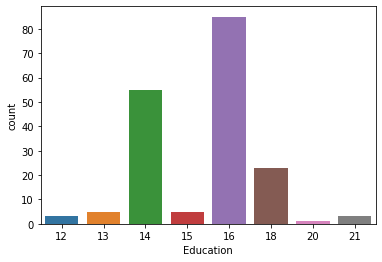

In [12]:
sns.countplot(data['Education'])
plt.show()

In [13]:
data['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [26]:
data[data['Usage']==7]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
163,TM798,28,Male,18,Partnered,7,5,77191,180
166,TM798,29,Male,14,Partnered,7,5,85906,180


In [28]:
pd.crosstab(data['Usage'],data['Product'])

Product,TM195,TM498,TM798
Usage,,,
2,19,14,0
3,37,31,1
4,22,12,18
5,2,3,12
6,0,0,7
7,0,0,2


In [33]:
pd.pivot_table(data,'Income',index=['Product'],columns=['Usage'],aggfunc="mean")

Usage,2,3,4,5,6,7
Product,,,,,,
TM195,46437.473684,46832.108108,46306.909091,39795.000000,NaN,NaN
TM498,47458.500000,49001.032258,51638.750000,45101.000000,NaN,NaN
TM798,NaN,54781.000000,71920.111111,76153.416667,84483.142857,81548.5


This imply that TM798 product is more comfortable compared with the other product as it is used almost everyday and people using it has fitness level of 5. As by the nature of product the quality of product increases by price, so insight also proves this statement, the people using product TM798 has far higher income than the people using other product, it means this rich section of people are capable of buying this product that may be of higher price and there are less people who are rich

In [62]:
data[data['Income']>70000][['Product']]['Product'].value_counts()

TM798    23
Name: Product, dtype: int64

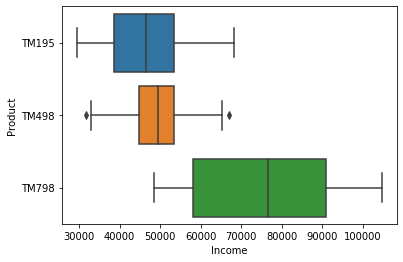

In [63]:
sns.boxplot(data['Income'],data['Product'])
plt.show()

In [38]:
pd.pivot_table(data,'Income',index=['Product'],columns=['Education'],aggfunc="max")

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
TM195,44343.0,42069.0,54576.0,37521.0,64809.0,68220.0,NaN,NaN
TM498,32973.0,53439.0,57987.0,67083.0,64809.0,65220.0,NaN,NaN
TM798,NaN,NaN,85906.0,NaN,92131.0,104581.0,74701.0,90886.0


In [40]:
data.groupby("Education")[['Income']].max()

,Income
Education,
12,44343
13,53439
14,85906
15,67083
16,92131
18,104581
20,74701
21,90886


With increase in education people tend to earn more, making them buy more of TM978 product

In [36]:
pd.crosstab(data['Education'],data['Product'])

Product,TM195,TM498,TM798
Education,,,
12,2,1,0
13,3,2,0
14,30,23,2
15,4,1,0
16,39,31,15
18,2,2,19
20,0,0,1
21,0,0,3


In [41]:
data.groupby("Product")[['Age']].mean()

,Age
Product,
TM195,28.55
TM498,28.90
TM798,29.10


In [42]:
data.groupby("Product")[['Age']].describe()

Age                                                 
        count   mean       std   min    25%   50%    75%   max
Product                                                       
TM195    80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0
TM498    60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0
TM798    40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0

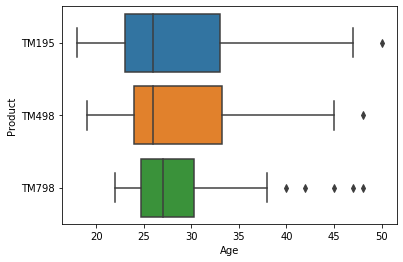

In [64]:
sns.boxplot(data['Age'],data['Product'])
plt.show()

In [103]:
pd.crosstab(data['Product'],data['Age'])

Age,18,19,20,21,22,23,24,25,26,27,...,40,41,42,43,44,45,46,47,48,50
Product,,,,,,,,,,,,,,,,,,,,,
TM195,1,3,2,4,4,8,5,7,7,3,...,1,1,0,1,1,0,1,1,0,1
TM498,0,1,3,3,0,7,3,11,3,1,...,3,0,0,0,0,1,0,0,1,0
TM798,0,0,0,0,3,3,4,7,2,3,...,1,0,1,0,0,1,0,1,1,0


This also tells that from above observation we get , more the income, people tend to buy TM798 more and is used almost all days in week. This tell that it would be more comfortable. So taking this insight only we can say from above graph that people who are bit age like 40 or more often buys this product as it is more comfortable. (it should also be noted that there are less part of people aged 40 or more who buys any of the fitness product, people between age 20 and 30 (youth ones) often buys these products.)

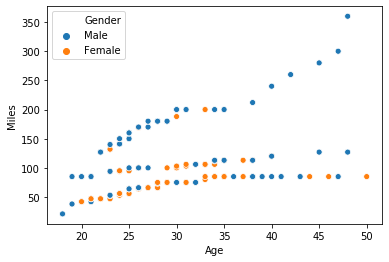

In [122]:
sns.scatterplot(data['Age'],data['Miles'],hue=data['Gender'])
plt.show()

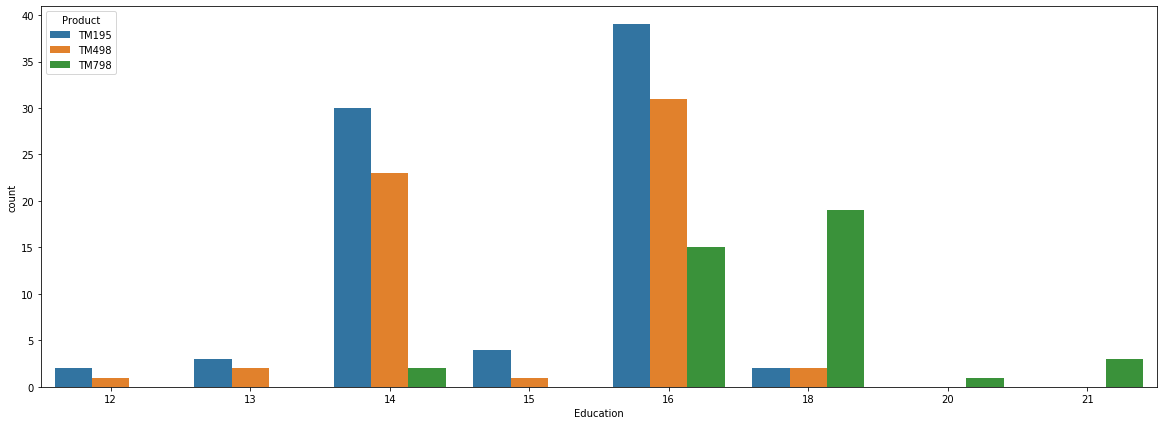

In [129]:
plt.figure(figsize=(20,7))
sns.countplot(ds['Education'],hue=ds['Product'])
plt.show()

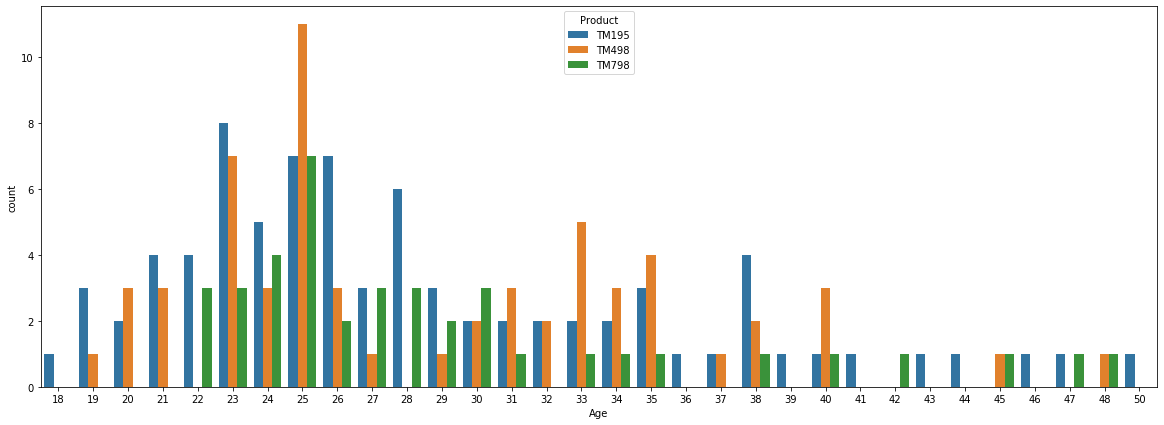

In [131]:
plt.figure(figsize=(20,7))
sns.countplot(ds['Age'],hue=ds['Product'])
plt.show()

Females mostly run between 50km to 100km

In [117]:
data[data['Product']=='TM798'][['Gender']]['Gender'].value_counts()

Male      33
Female     7
Name: Gender, dtype: int64

In [109]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

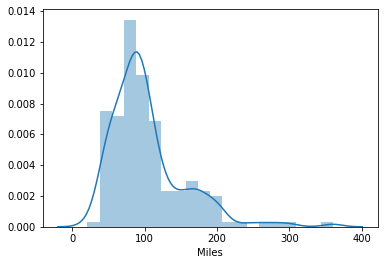

In [22]:
sns.distplot(data['Miles'])
plt.show()

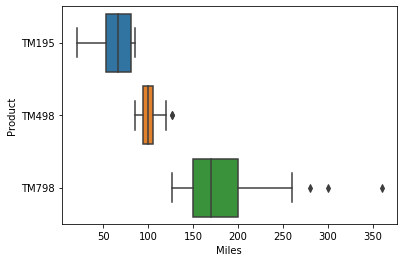

In [65]:
sns.boxplot(data['Miles'],data['Product'])
plt.show()

As stated from the above observation that product TM798 is more comfortable and good quality wise as compared to the other ones as it more expensive that is why people who use this runs far more miles in a week than any other product users. The reason might be as it is expensive it has got other good features , comfort, and since we have seen users of this product uses this everyday so the huge numbers of miles is obvious.

In [33]:
data['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

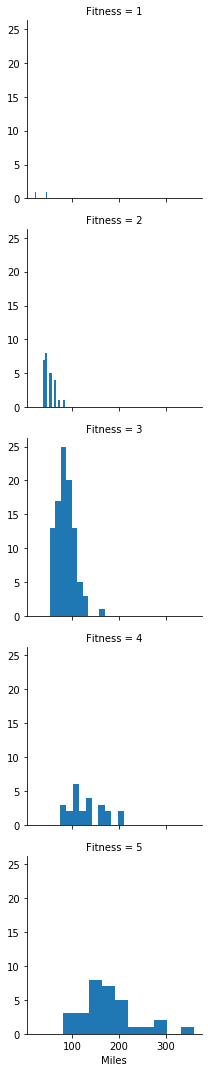

In [35]:
g = sns.FacetGrid(data,row="Fitness")
g = g.map(plt.hist,"Miles")
plt.show()

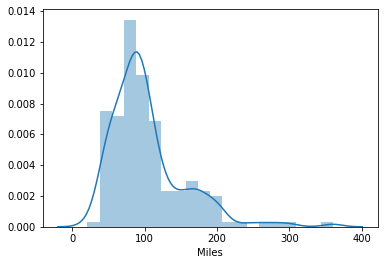

In [41]:
sns.distplot(data['Miles'])
plt.show()

In [100]:
ds = data.copy()

In [101]:
ds['Age'] = ds['Age'].astype('category')

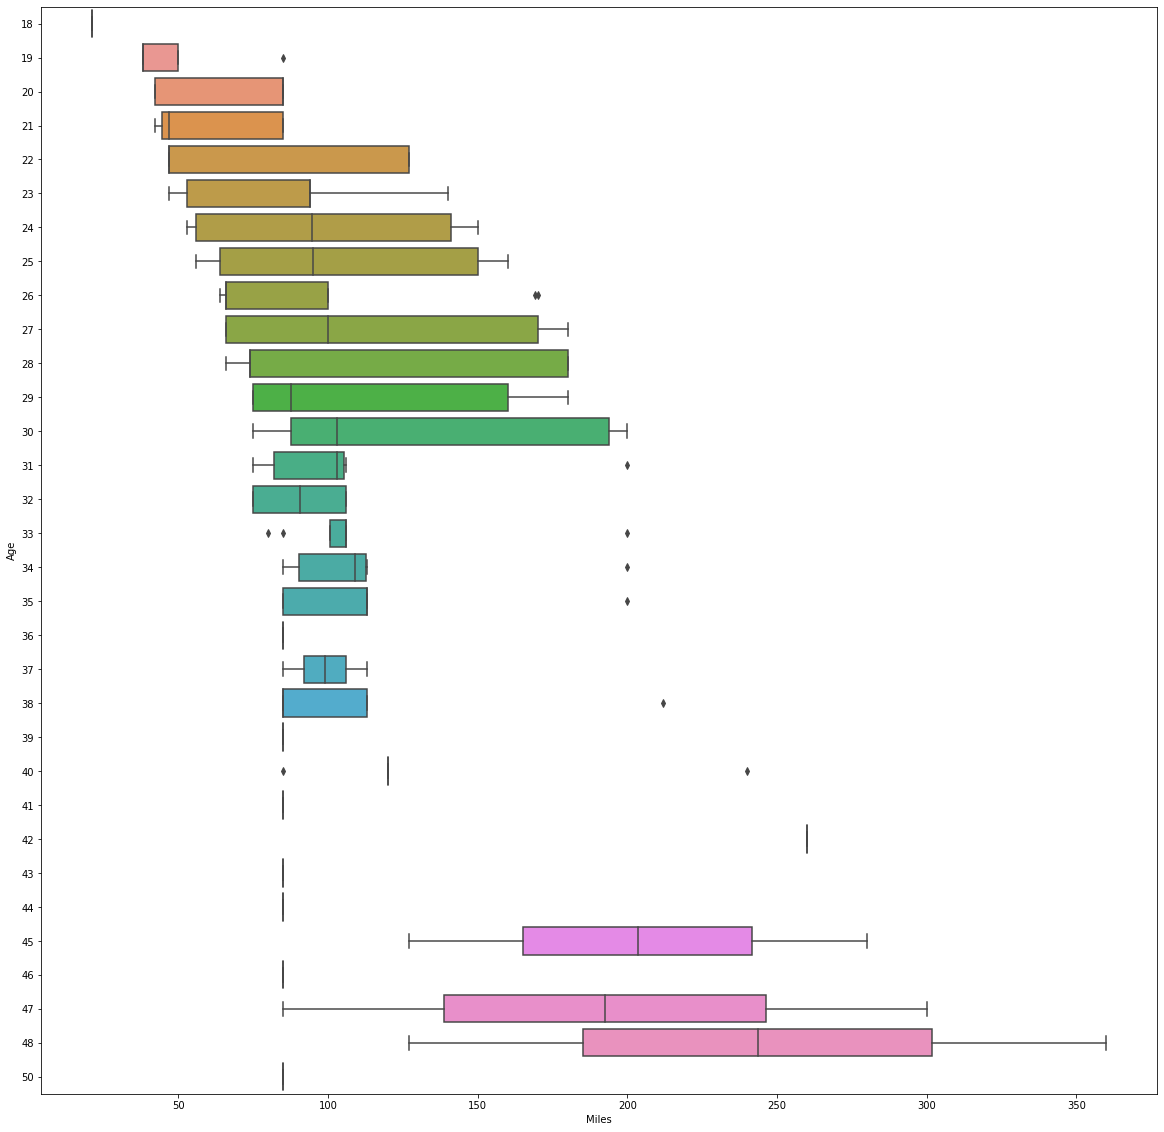

In [102]:
plt.figure(figsize=(20,20))
sns.boxplot(ds['Miles'],ds['Age'])

There is an intresting insight that people who are bit aged more than 40 yrs runs more miles even the maximum compared to the younger ones. The reason might be that they have more time to perform other activities and the youger ones schedule is hectic and dont have time to run.

In [80]:
data.groupby(["Product","Gender"])[['Fitness']].count()

Fitness
Product Gender         
TM195   Female       40
        Male         40
TM498   Female       29
        Male         31
TM798   Female        7
        Male         33

In [81]:
pd.crosstab(data['Product'],data['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [82]:
## this is much better option than groupby count
pd.crosstab(data['Product'],data['Fitness'])  

Fitness,1,2,3,4,5
Product,,,,,
TM195,1,14,54,9,2
TM498,1,12,39,8,0
TM798,0,0,4,7,29


In [84]:
pd.crosstab(data['Product'],data['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


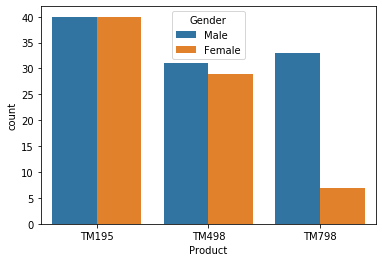

In [85]:
sns.countplot(data['Product'],hue=data['Gender'])
plt.show()

In [92]:
pd.pivot_table(data,index=['Product','Gender'],columns=['MaritalStatus'],aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [97]:
pd.pivot_table(data,'Age',index=['Product','Gender'],columns=['MaritalStatus'])

MaritalStatus   Partnered     Single
Product Gender                      
TM195   Female  28.333333  28.692308
        Male    31.380952  25.631579
TM498   Female  30.000000  28.142857
        Male    30.380952  25.200000
TM798   Female  29.000000  24.333333
        Male    30.000000  28.928571

In [98]:
pd.pivot_table(data,'Income',index=['Product','Gender'],columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [99]:
data['Age'].std()

6.943498135399795

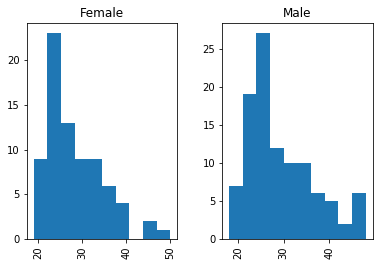

In [101]:
data.hist(by='Gender',column='Age')
plt.show()

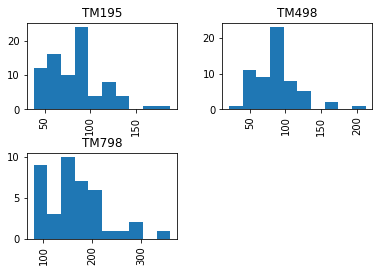

In [102]:
data.hist(by='Product',column="Miles")
plt.show()

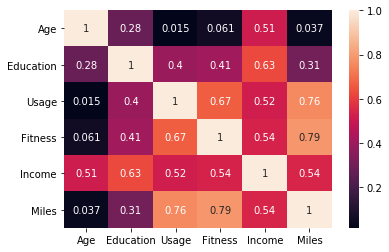

In [105]:
sns.heatmap(data.corr(),annot=True)
plt.show()